In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
train_data = pd.read_csv("archive/fraudTrain.csv")
test_data = pd.read_csv("archive/fraudTest.csv")

In [6]:
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [8]:
# Preprocessing
# Assuming the dataset has columns 'features' and 'target'
X_train = train_data.drop(['is_fraud', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)  # Features
y_train = train_data['is_fraud']  # Target

In [9]:
# Splitting into training and testing sets
X_test = test_data.drop(['is_fraud', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)
y_test = test_data['is_fraud']

In [10]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Assuming binary classification, change to appropriate value for multiclass
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
40522/40522 [==============================] - 34s 835us/step - loss: 0.0221 - accuracy: 0.9943 - val_loss: 0.0234 - val_accuracy: 0.9944
Epoch 2/20
40522/40522 [==============================] - 34s 837us/step - loss: 0.0200 - accuracy: 0.9946 - val_loss: 0.0219 - val_accuracy: 0.9955
Epoch 3/20
40522/40522 [==============================] - 34s 850us/step - loss: 0.0197 - accuracy: 0.9945 - val_loss: 0.0198 - val_accuracy: 0.9959
Epoch 4/20
40522/40522 [==============================] - 33s 819us/step - loss: 0.0195 - accuracy: 0.9945 - val_loss: 0.0176 - val_accuracy: 0.9961
Epoch 5/20
40522/40522 [==============================] - 33s 814us/step - loss: 0.0194 - accuracy: 0.9945 - val_loss: 0.0181 - val_accuracy: 0.9960
Epoch 6/20
40522/40522 [==============================] - 34s 833us/step - loss: 0.0194 - accuracy: 0.9945 - val_loss: 0.0166 - val_accuracy: 0.9960
Epoch 7/20
40522/40522 [==============================] - 33s 809us/step - loss: 0.0193 - accuracy: 0.9945

## L2 Regularization:


In [14]:
from tensorflow.keras import regularizers

# Define model with L2 regularization
l2_model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(2, activation='softmax')  # Assuming binary classification, change to appropriate value for multiclass
])

# Compile the model
l2_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
l2_history = l2_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
l2_test_loss, l2_test_accuracy = l2_model.evaluate(X_test, y_test)
print("Test Accuracy with L2 Regularization:", l2_test_accuracy)


Epoch 1/10
40522/40522 [==============================] - 34s 818us/step - loss: 0.0259 - accuracy: 0.9941 - val_loss: 0.0191 - val_accuracy: 0.9961
Epoch 2/10
40522/40522 [==============================] - 33s 814us/step - loss: 0.0228 - accuracy: 0.9943 - val_loss: 0.0171 - val_accuracy: 0.9961
Epoch 3/10
40522/40522 [==============================] - 33s 821us/step - loss: 0.0225 - accuracy: 0.9944 - val_loss: 0.0167 - val_accuracy: 0.9962
Epoch 4/10
40522/40522 [==============================] - 33s 813us/step - loss: 0.0224 - accuracy: 0.9943 - val_loss: 0.0166 - val_accuracy: 0.9961
Epoch 5/10
40522/40522 [==============================] - 33s 809us/step - loss: 0.0224 - accuracy: 0.9944 - val_loss: 0.0168 - val_accuracy: 0.9962
Epoch 6/10
40522/40522 [==============================] - 33s 814us/step - loss: 0.0223 - accuracy: 0.9943 - val_loss: 0.0167 - val_accuracy: 0.9960
Epoch 7/10
40522/40522 [==============================] - 33s 813us/step - loss: 0.0223 - accuracy: 0.9943

## Dropout:

In [16]:
from tensorflow.keras.layers import Dropout

# Define model with Dropout
dropout_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # 20% dropout
    Dense(64, activation='relu'),
    Dropout(0.2),  # 20% dropout
    Dense(2, activation='softmax')  # Assuming binary classification, change to appropriate value for multiclass
])

# Compile the model
dropout_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
dropout_history = dropout_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
dropout_test_loss, dropout_test_accuracy = dropout_model.evaluate(X_test, y_test)
print("Test Accuracy with Dropout:", dropout_test_accuracy)


Epoch 1/10
40522/40522 [==============================] - 39s 950us/step - loss: 0.0236 - accuracy: 0.9942 - val_loss: 0.0179 - val_accuracy: 0.9961
Epoch 2/10
40522/40522 [==============================] - 38s 947us/step - loss: 0.0215 - accuracy: 0.9942 - val_loss: 0.0186 - val_accuracy: 0.9961
Epoch 3/10
40522/40522 [==============================] - 38s 945us/step - loss: 0.0211 - accuracy: 0.9942 - val_loss: 0.0191 - val_accuracy: 0.9961
Epoch 4/10
40522/40522 [==============================] - 39s 952us/step - loss: 0.0209 - accuracy: 0.9942 - val_loss: 0.0168 - val_accuracy: 0.9961
Epoch 5/10
40522/40522 [==============================] - 39s 954us/step - loss: 0.0207 - accuracy: 0.9942 - val_loss: 0.0183 - val_accuracy: 0.9961
Epoch 6/10
40522/40522 [==============================] - 38s 947us/step - loss: 0.0207 - accuracy: 0.9943 - val_loss: 0.0207 - val_accuracy: 0.9961
Epoch 7/10
40522/40522 [==============================] - 39s 951us/step - loss: 0.0207 - accuracy: 0.9942

## L2 Regularization + Dropout:

In [17]:
# Define model with L2 Regularization + Dropout
l2_dropout_model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # 20% dropout
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),  # 20% dropout
    Dense(2, activation='softmax')  # Assuming binary classification, change to appropriate value for multiclass
])

# Compile the model
l2_dropout_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
l2_dropout_history = l2_dropout_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
l2_dropout_test_loss, l2_dropout_test_accuracy = l2_dropout_model.evaluate(X_test, y_test)
print("Test Accuracy with L2 Regularization + Dropout:", l2_dropout_test_accuracy)


Epoch 1/10
40522/40522 [==============================] - 39s 963us/step - loss: 0.0271 - accuracy: 0.9940 - val_loss: 0.0174 - val_accuracy: 0.9961
Epoch 2/10
40522/40522 [==============================] - 41s 1ms/step - loss: 0.0241 - accuracy: 0.9942 - val_loss: 0.0173 - val_accuracy: 0.9961
Epoch 3/10
40522/40522 [==============================] - 41s 1ms/step - loss: 0.0239 - accuracy: 0.9942 - val_loss: 0.0170 - val_accuracy: 0.9961
Epoch 4/10
40522/40522 [==============================] - 42s 1ms/step - loss: 0.0239 - accuracy: 0.9942 - val_loss: 0.0173 - val_accuracy: 0.9961
Epoch 5/10
40522/40522 [==============================] - 40s 999us/step - loss: 0.0238 - accuracy: 0.9942 - val_loss: 0.0174 - val_accuracy: 0.9961
Epoch 6/10
40522/40522 [==============================] - 40s 988us/step - loss: 0.0238 - accuracy: 0.9942 - val_loss: 0.0167 - val_accuracy: 0.9961
Epoch 7/10
40522/40522 [==============================] - 40s 991us/step - loss: 0.0238 - accuracy: 0.9942 - val

## Early Stopping:

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Stop training when validation loss doesn't improve for 3 epochs

# Define model with early stopping
early_stopping_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Assuming binary classification, change to appropriate value for multiclass
])

# Compile the model
early_stopping_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
early_stopping_history = early_stopping_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
early_stopping_test_loss, early_stopping_test_accuracy = early_stopping_model.evaluate(X_test, y_test)
print("Test Accuracy with Early Stopping:", early_stopping_test_accuracy)


Epoch 1/10
40522/40522 [==============================] - 36s 877us/step - loss: 0.0223 - accuracy: 0.9942 - val_loss: 0.0166 - val_accuracy: 0.9960
Epoch 2/10
40522/40522 [==============================] - 36s 885us/step - loss: 0.0201 - accuracy: 0.9944 - val_loss: 0.0196 - val_accuracy: 0.9956
Epoch 3/10
40522/40522 [==============================] - 35s 869us/step - loss: 0.0198 - accuracy: 0.9944 - val_loss: 0.0163 - val_accuracy: 0.9960
Epoch 4/10
40522/40522 [==============================] - 35s 869us/step - loss: 0.0197 - accuracy: 0.9944 - val_loss: 0.0183 - val_accuracy: 0.9961
Epoch 5/10
40522/40522 [==============================] - 35s 864us/step - loss: 0.0195 - accuracy: 0.9945 - val_loss: 0.0191 - val_accuracy: 0.9962
Epoch 6/10
17367/17367 [==============================] - 10s 550us/step - loss: 0.0167 - accuracy: 0.9961
Test Accuracy with Early Stopping: 0.9960717558860779


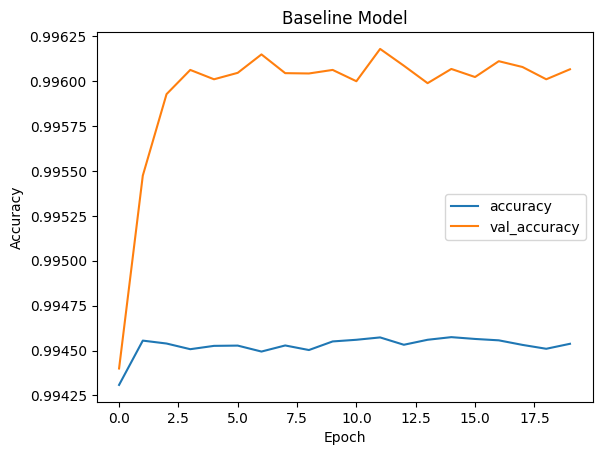

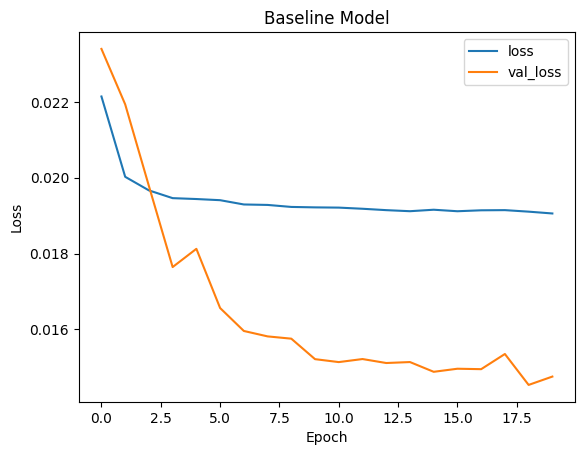

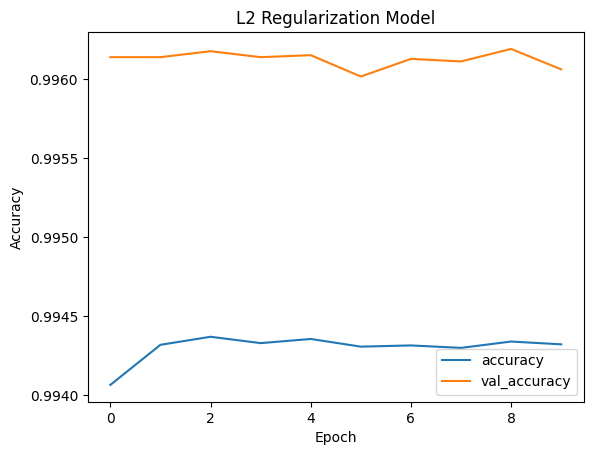

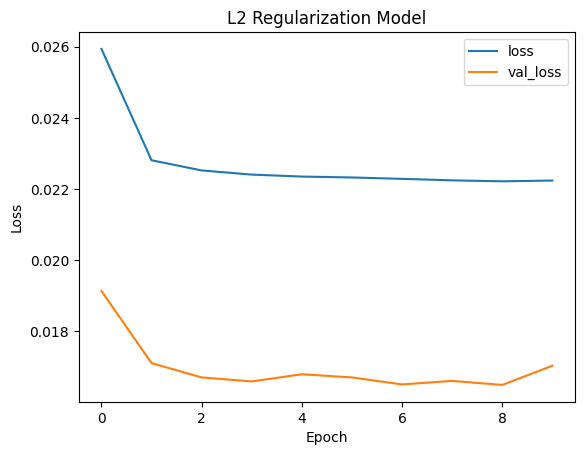

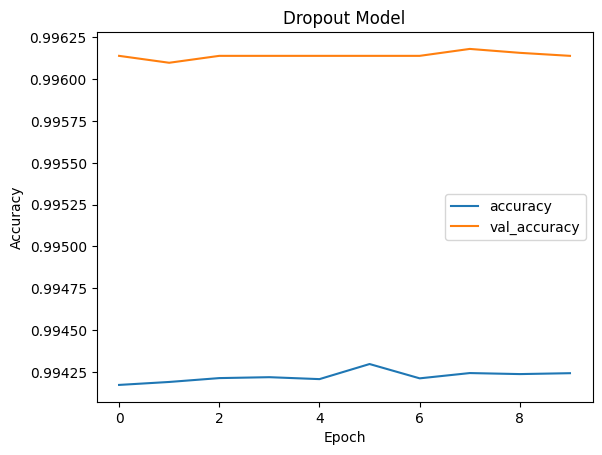

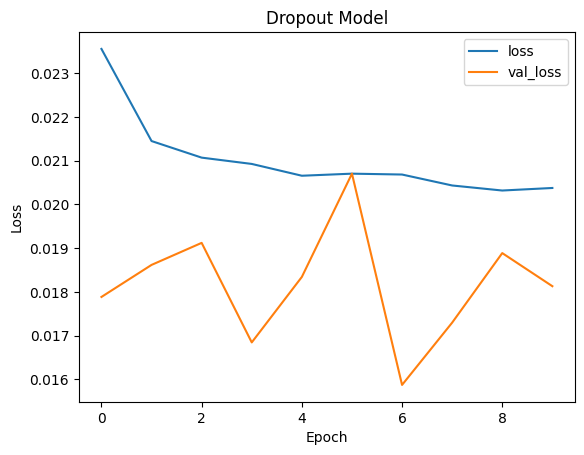

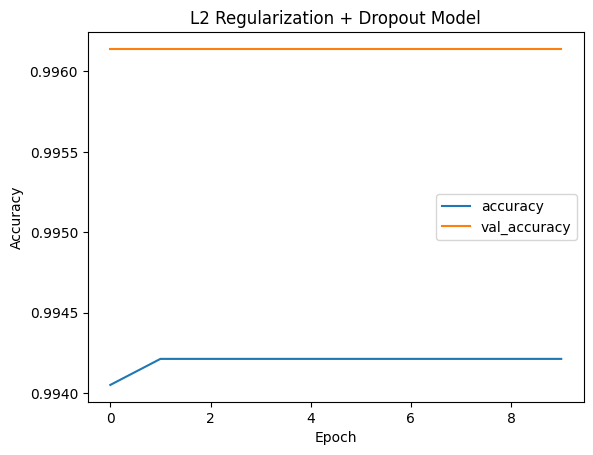

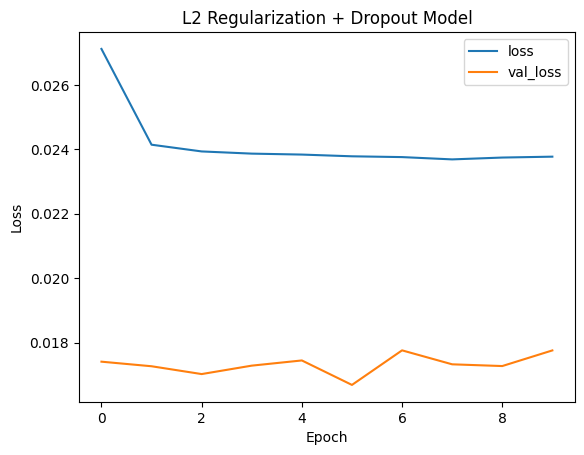

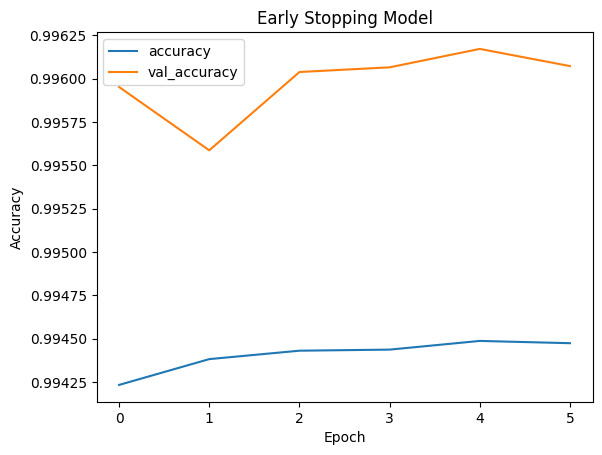

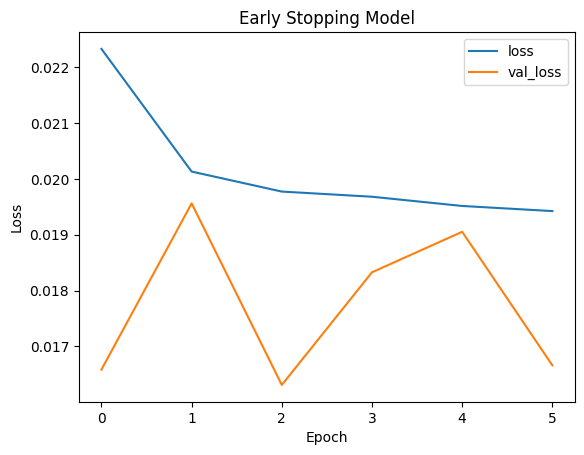

In [19]:
import matplotlib.pyplot as plt

def plot_curves(history, title):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plotting curves for each model
plot_curves(history, "Baseline Model")
plot_curves(l2_history, "L2 Regularization Model")
plot_curves(dropout_history, "Dropout Model")
plot_curves(l2_dropout_history, "L2 Regularization + Dropout Model")
plot_curves(early_stopping_history, "Early Stopping Model")
